In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_2014 = pd.read_csv("/content/india_election_2014.csv")
df_2019 = pd.read_csv("/content/india_election_2019.csv")

In [4]:
df_2014.head()

,Unnamed: 0,#,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %
0,0,1,Adilabad,1.0,ST,Telangana,Godam Nagesh,Telangana Rashtra Samithi,1386233.0,1045839.0,75.4,171290.0,16.4
1,1,2,Agra,18.0,SC,Uttar Pradesh,Dr. Ram Shankar Katheria,Bharatiya Janta Party,1814739.0,1070400.0,59.0,300263.0,28.1
2,2,3,Ahmadnagar,37.0,GEN,Maharashtra,Gandhi Dilipkumar Mansukhlal,Bharatiya Janta Party,1699408.0,1062318.0,62.5,209122.0,19.7
3,3,4,Ahmedabad East,7.0,GEN,Gujarat,Paresh Rawal,Bharatiya Janta Party,1601832.0,985525.0,61.5,326633.0,33.1
4,4,5,Ahmedabad West,8.0,SC,Gujarat,Dr. Kirit P Solanki,Bharatiya Janta Party,1534400.0,964609.0,62.9,320311.0,33.2


In [5]:
df_2019.head()

,Unnamed: 0,#,PC Name,No,Type,State,Winning Candidate,Party,Electors,Votes,Turnout,Margin,Margin %
0,0,543,Vellore,8,GEN,Tamil Nadu,Kathir Anand,Dravida Munetra Kazhagam,1438643.0,1028100.0,71.46,8141.0,0.79
1,1,542,Karimganj,1,SC,Assam,Kripanath Mallah,Bharatiya Janta Party,1165997.0,1061160.0,79.18,38389.0,3.62
2,2,1,Adilabad,1,ST,Telangana,Soyam Bapu Rao,Bharatiya Janta Party,1382837.0,1063730.0,77.90,58560.0,5.50
3,3,2,Agra,18,SC,Uttar Pradesh,Satyapal Singh Baghel,Bharatiya Janta Party,1866262.0,1145323.0,61.70,211546.0,18.50
4,4,3,Ahmadnagar,37,GEN,Maharashtra,Dr. Sujay Radhakrishna Vikhepatil,Bharatiya Janta Party,1793677.0,1203797.0,67.30,281474.0,23.40


In [7]:
a = df_2014.shape
b = df_2019.shape
print(a)
print(b)


(543, 13)
(543, 13)


Missing Values in 2014 Data

In [8]:
df_2014.isnull().sum().sort_values(ascending=False)

,0
Unnamed: 0,0
#,0
PC Name,0
No,0
Type,0
State,0
Winning Candidate,0
Party,0
Electors,0
Votes,0


Missing Values in 2019 Data

In [9]:
df_2019.isnull().sum().sort_values(ascending=False)

,0
Type,32
Unnamed: 0,0
#,0
PC Name,0
No,0
State,0
Winning Candidate,0
Party,0
Electors,0
Votes,0


Here we observe that the dataset so obtained, is free of null values, hence it is good to go for duplicates or further processes

In [10]:
x = df_2014.duplicated().sum()
y = df_2019.duplicated().sum()
print("Duplicates in 2014 : ",x)
print("Duplicates in 2019 : ",y)

Duplicates in 2014 :  0
Duplicates in 2019 :  0


No duplicates means, we are good to go for analysis and comparisons between the columns

# **Analysis using different Graphs**

**Party-wise Seat Distribution (Bar Chart)**

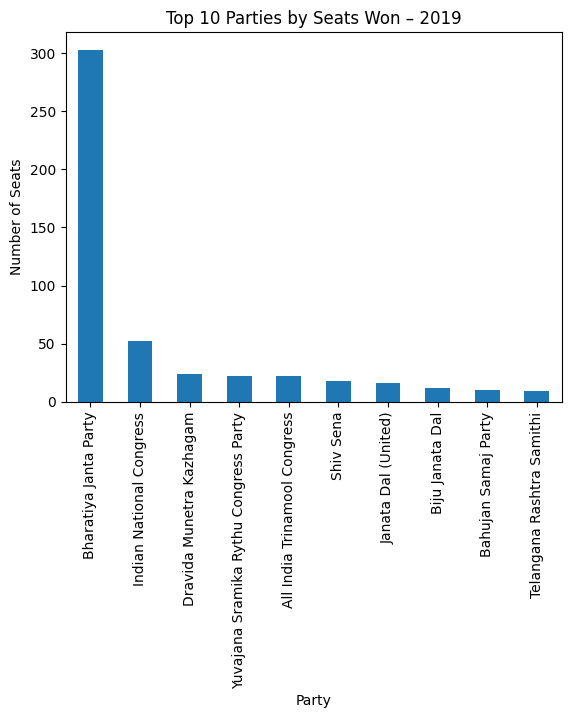

In [11]:
party_seats_2019 = df_2019["Party"].value_counts().head(10)

plt.figure()
party_seats_2019.plot(kind="bar")
plt.title("Top 10 Parties by Seats Won – 2019")
plt.xlabel("Party")
plt.ylabel("Number of Seats")
plt.show()

**Vote Share Distribution (Histogram)**

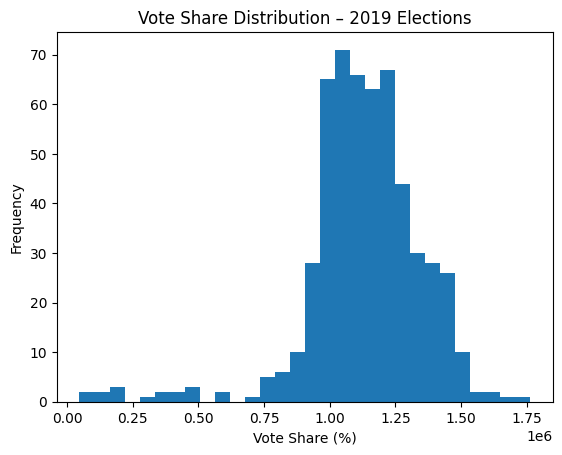

In [13]:
plt.figure()
plt.hist(df_2019["Votes"], bins=30)
plt.title("Vote Share Distribution – 2019 Elections")
plt.xlabel("Vote Share (%)")
plt.ylabel("Frequency")
plt.show()

**Margin of Victory**

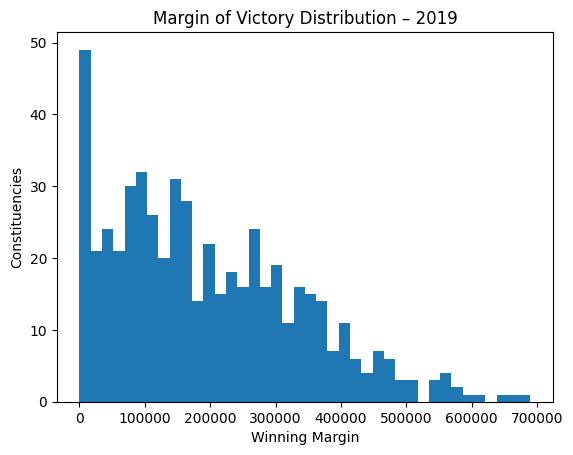

In [14]:
plt.figure()
plt.hist(df_2019["Margin"], bins=40)
plt.title("Margin of Victory Distribution – 2019")
plt.xlabel("Winning Margin")
plt.ylabel("Constituencies")
plt.show()

**State-wise Seat Count (Top States)**

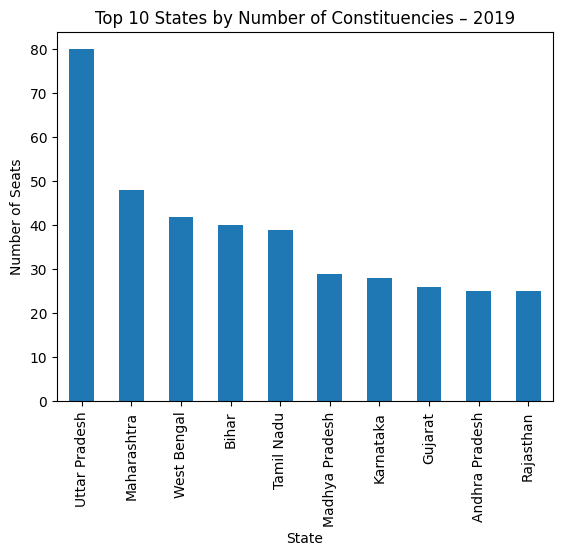

In [15]:
state_seats = df_2019["State"].value_counts().head(10)

plt.figure()
state_seats.plot(kind="bar")
plt.title("Top 10 States by Number of Constituencies – 2019")
plt.xlabel("State")
plt.ylabel("Number of Seats")
plt.show()


**Party-wise Average Vote Share**

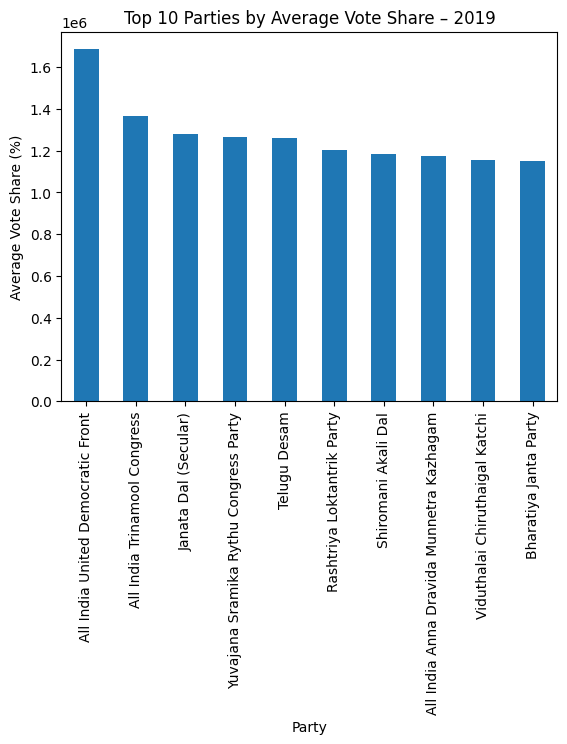

In [17]:
party_vote_share = (
    df_2019.groupby("Party")["Votes"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
party_vote_share.plot(kind="bar")
plt.title("Top 10 Parties by Average Vote Share – 2019")
plt.xlabel("Party")
plt.ylabel("Average Vote Share (%)")
plt.show()


# **Year wise comparison 2014 vs 2019**

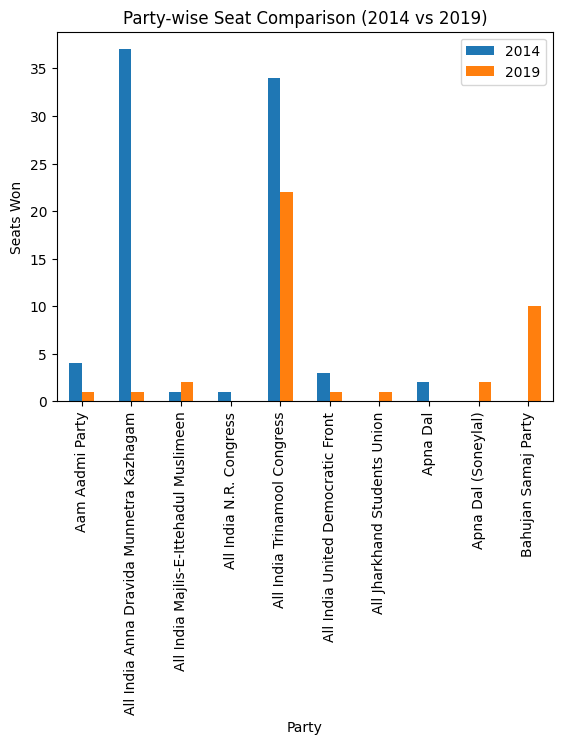

In [18]:
seats_2014 = df_2014["Party"].value_counts()
seats_2019 = df_2019["Party"].value_counts()

comparison = pd.DataFrame({
    "2014": seats_2014,
    "2019": seats_2019
}).fillna(0).head(10)

comparison.plot(kind="bar")
plt.title("Party-wise Seat Comparison (2014 vs 2019)")
plt.xlabel("Party")
plt.ylabel("Seats Won")
plt.show()


# **2019 vs 2024 Comparative EDA**

In [20]:
df_2024 = pd.read_csv("/content/election_results_2024.csv")

In [21]:
df_2019["year"] = 2019
df_2024["year"] = 2024

Combining Datesets for best analysis

In [22]:
combined_df = pd.concat([df_2019, df_2024], ignore_index=True)

Party-wise seat comparison

In [31]:
party_year_seats = (
    combined_df.groupby(["year","Margin"])
    .size()
    .reset_index(name="seats")
)


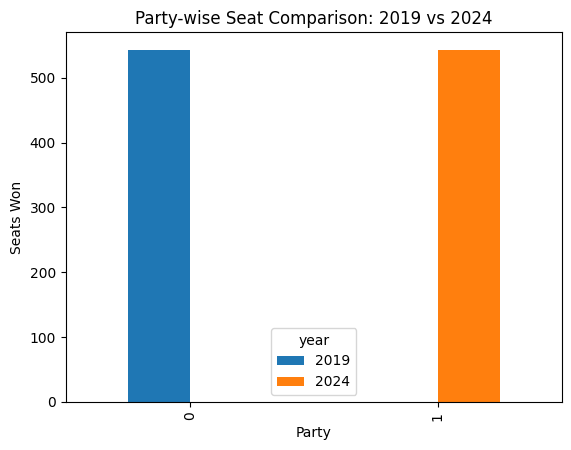

In [28]:
import matplotlib.pyplot as plt

pivot = party_year_seats.pivot(
     columns="year", values="seats"
).fillna(0)

pivot.head(10).plot(kind="bar")
plt.title("Party-wise Seat Comparison: 2019 vs 2024")
plt.xlabel("Party")
plt.ylabel("Seats Won")
plt.show()


In [32]:
combined_df.groupby("year")["Margin"].describe()


,count,unique,top,freq
year,,,,
2019,543.0,543.0,6229.0,1.0
2024,543,543,46188,1


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('top').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)